In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
import numpy as np
cl = np.load('./cl_planck_lensed.npy')
ll = cl[:,0]
cl = cl[:,1]
!pip install -q 'healpy==1.13.0'
'astropy==4.0'
import healpy
import healpy as hp

     |████████████████████████████████| 11.8 MB 8.3 MB/s 


In [ ]:
cmb_map = healpy.sphtfunc.synfast(cl, 2048)

/usr/local/lib/python3.7/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


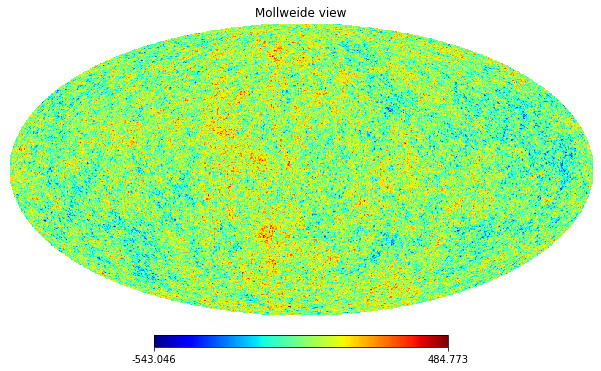

In [ ]:
import healpy as hp
hp.mollview(cmb_map, cmap='jet')

In [ ]:
m_map = hp.read_map('./COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
NSIDE = 2048
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 2048 is 0.029 deg


In [ ]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

50331648


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


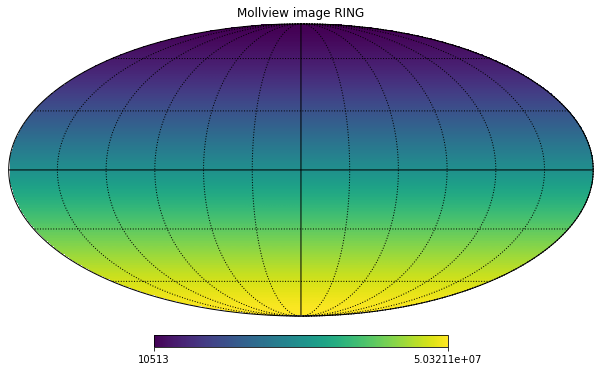

In [ ]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [ ]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [ ]:
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(10))

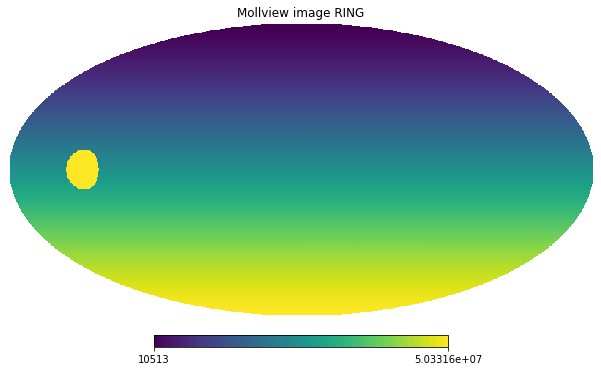

In [ ]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [ ]:
theta, phi = np.degrees(hp.pix2ang(nside=2048, ipix=[0, 1, 2, 3, 4]))

In [ ]:
theta

array([0.02284268, 0.02284268, 0.02284268, 0.02284268, 0.04568536])

In [ ]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

In [ ]:
hp.write_map("cmb_map", m_map, overwrite=True)

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:187: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning)


In [ ]:
mask = hp.read_map("COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits").astype(np.bool_)
m_map_masked = hp.ma(cmb_map)
m_map_masked.mask = np.logical_not(mask)

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


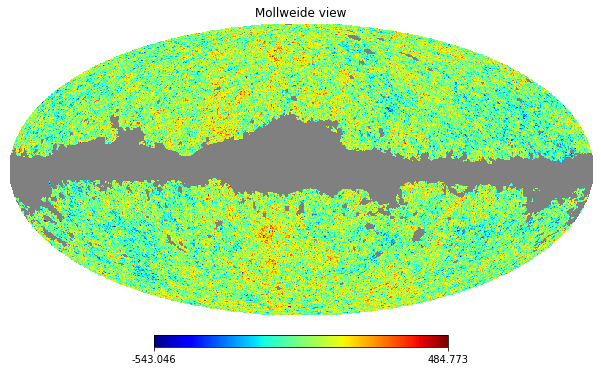

In [ ]:
hp.mollview(m_map_masked.filled(), cmap='jet')